In [3]:
import pandas as pd
import numpy as np
df =pd.read_csv("test_data1_clean.csv")
df.head()
df.shape

(44, 6)

In [7]:
df =pd.read_csv("test_data2_clean.csv")
df.head()
df.shape

(44, 9)

In [8]:
df =pd.read_csv("combined_clean.csv")
df.head()
df.shape

(88, 13)

In [10]:
import pandas as pd

# Load your CSV
file_path = "Enhets data - Katarinasstädtjänst Enhet Grind - RSRP.csv"
df = pd.read_csv(file_path)

# Replace 'date' column with merged datetime
df['date'] = pd.to_datetime(
    df['date'].astype(str) + " " + df['time'].astype(str),
    errors='coerce'
)

# Drop the separate 'time' column
df = df.drop(columns=['time'])

# Optionally rename 'date' → 'datetime'
df = df.rename(columns={'date': 'datetime'})

# Save to new CSV
output_file = "Enhets_data_with_datetime.csv"
df.to_csv(output_file, index=False)

print(f"Saved as: {output_file}")

Saved as: Enhets_data_with_datetime.csv


In [12]:
print(df.columns)

Index(['  _id ', ' _uuid ', 'datetime', 'just_booted', ' reset_reason',
       'uptime', 'fw_version', 'modem_fw_version', 'rsrp'],
      dtype='object')


   timestamp                 _timestamp             _ack_timestamp  svarstid_s
0        NaT 2025-10-01 07:11:44.011206 2025-10-01 07:11:46.841378    2.830172
1        NaT 2025-10-01 07:08:44.881946 2025-10-01 07:08:47.644400    2.762454
2        NaT 2025-10-01 07:07:25.886403 2025-10-01 07:07:28.281225    2.394822
3        NaT 2025-10-01 07:07:06.338205 2025-10-01 07:07:06.527139    0.188934
4        NaT 2025-10-01 06:56:37.199648 2025-10-01 06:56:37.326844    0.127196
5        NaT 2025-10-01 05:56:50.590169 2025-10-01 05:56:50.766510    0.176341
6        NaT 2025-10-01 05:07:54.938149 2025-10-01 05:07:55.076295    0.138146
14       NaT 2025-09-30 10:59:30.796277 2025-09-30 10:59:32.230762    1.434485
15       NaT 2025-09-30 10:26:43.934322 2025-09-30 10:26:46.146682    2.212360
16       NaT 2025-09-30 09:53:36.222172 2025-09-30 09:53:36.395317    0.173145
17       NaT 2025-09-30 08:32:48.751253 2025-09-30 08:32:48.959230    0.207977
18       NaT 2025-09-30 07:20:41.829774 2025-09-30 0

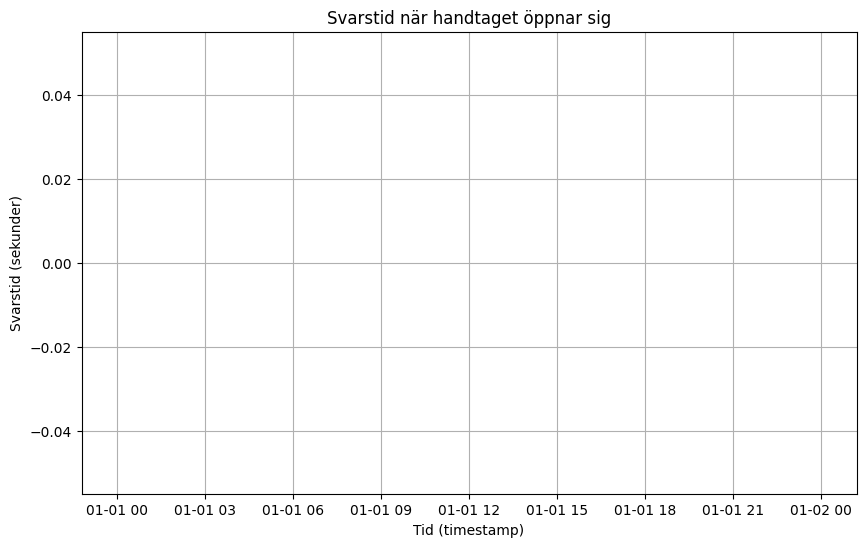

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Läs in CSV-filen
df = pd.read_csv("combined_clean.csv")

# Konvertera tidskolumner till datetime
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")
df["_timestamp"] = pd.to_datetime(df["_timestamp"], errors="coerce")
df["_ack_timestamp"] = pd.to_datetime(df["_ack_timestamp"], errors="coerce")

# Filtrera bort rader som saknar tidsdata
df = df.dropna(subset=["_timestamp", "_ack_timestamp"])

# Beräkna svarstiden i sekunder
df["svarstid_s"] = (df["_ack_timestamp"] - df["_timestamp"]).dt.total_seconds()

# Visa resultatet
print(df[["timestamp", "_timestamp", "_ack_timestamp", "svarstid_s"]])

# --- Rita en graf över svarstiderna ---
plt.figure(figsize=(10, 6))
plt.plot(df["timestamp"], df["svarstid_s"], marker="o")
plt.xlabel("Tid (timestamp)")
plt.ylabel("Svarstid (sekunder)")
plt.title("Svarstid när handtaget öppnar sig")
plt.grid(True)
plt.show()

In [28]:
# 1. Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# 2. Load CSV files for each device
files = {
    'Katarinasstädtjänst Enhet Grind': '3_enheterna_input_folder/Enhets data - Katarinasstädtjänst Enhet Grind _combined.csv',
    'Varbergs boxningsklubb': '3_enheterna_output_folder/Enhets data - Varbergs boxningsklubb_combined.csv',
    'SMRTEC huvudEntre': '3_enheterna_output_folder/Enhets data - SMRTEC huvudEntre_combined.csv',
    'Combined': 'combined_clean.csv'
}
devices_data = {}
for label, path in files.items():
    try:
        df = pd.read_csv(path)
        # Convert timestamps if columns exist
        for col in ['timestamp', '_timestamp', '_ack_timestamp']:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')
        devices_data[label] = df
    except Exception as e:
        print(f"Error loading {label}: {e}")

In [32]:
# 3. Calculate response times for each device
device_response_times = {}
for label, df in devices_data.items():
    if '_timestamp' in df.columns and '_ack_timestamp' in df.columns:
        filtered = df.dropna(subset=['_timestamp', '_ack_timestamp']).copy()
        filtered['response_time_s'] = (filtered['_ack_timestamp'] - filtered['_timestamp']).dt.total_seconds()
        device_response_times[label] = filtered[['timestamp', 'response_time_s']]
    else:
        print(f"{label} missing required timestamp columns.")

In [33]:
# 4. Combine response times into one DataFrame for plotting
import numpy as np
combined = []
for label, df in device_response_times.items():
    temp = df.copy()
    temp['device'] = label
    combined.append(temp)
combined_df = pd.concat(combined, ignore_index=True)
# Optionally align timestamps if needed (not done here)

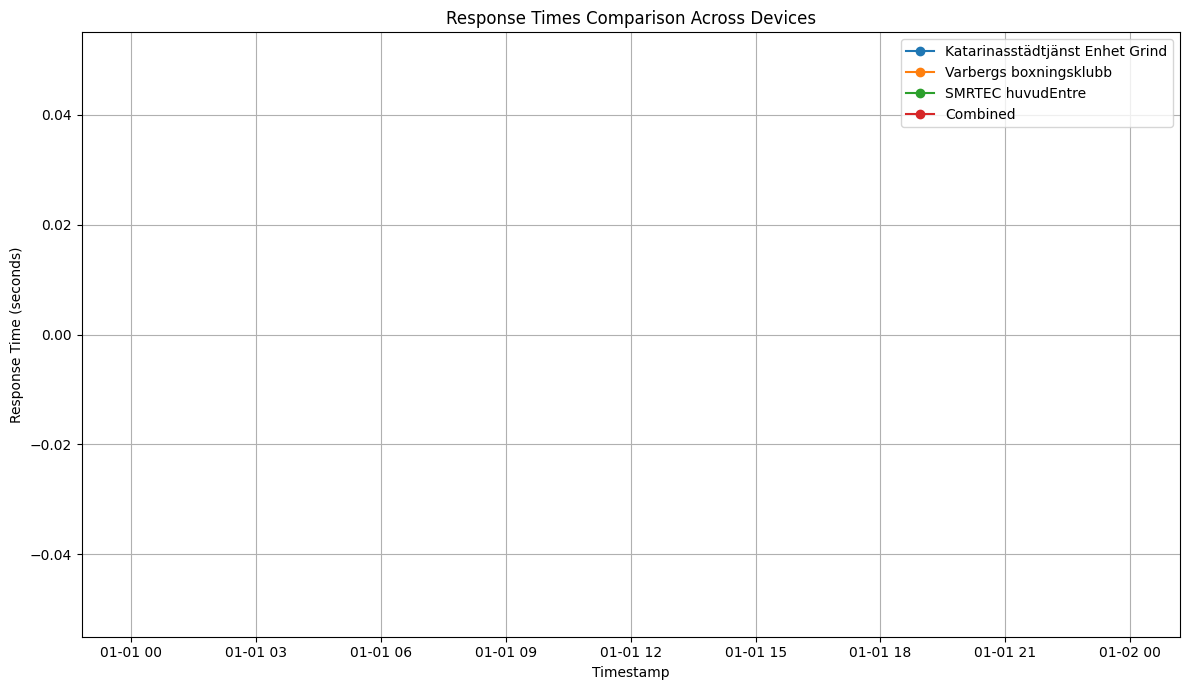

In [34]:
# 5. Plot response times for each device
plt.figure(figsize=(12, 7))
for label in device_response_times.keys():
    df = combined_df[combined_df['device'] == label]
    plt.plot(df['timestamp'], df['response_time_s'], marker='o', label=label)
plt.xlabel('Timestamp')
plt.ylabel('Response Time (seconds)')
plt.title('Response Times Comparison Across Devices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Katarinasstädtjänst Enhet Grind: 1418 response times
     timestamp  response_time_s
1045       NaT         0.256512
1046       NaT         0.955650
1047       NaT         0.167705
1048       NaT         0.870165
1049       NaT         0.624707
Varbergs boxningsklubb: 268 response times
     timestamp  response_time_s
1044       NaT         0.151127
1045       NaT         1.989081
1046       NaT         0.174243
1057       NaT         0.213240
1058       NaT         1.932838
SMRTEC huvudEntre: 765 response times
    timestamp  response_time_s
245       NaT         0.222350
246       NaT         0.162132
247       NaT         1.002831
248       NaT         0.134289
249       NaT         0.132626
Combined: 36 response times
  timestamp  response_time_s
0       NaT         2.830172
1       NaT         2.762454
2       NaT         2.394822
3       NaT         0.188934
4       NaT         0.127196


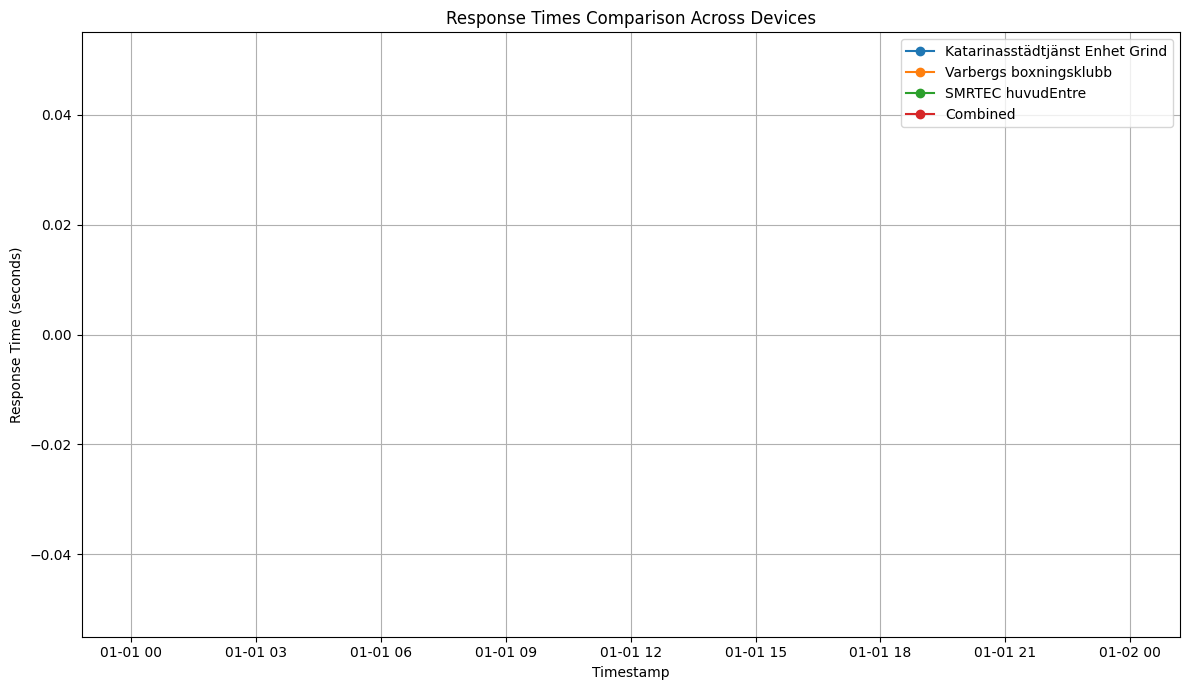

In [35]:
# Debug: Print number of response times per device
for label, df in device_response_times.items():
    print(f"{label}: {len(df)} response times")
    print(df.head())

# Plot only if there is data
plt.figure(figsize=(12, 7))
plotted = False
for label in device_response_times.keys():
    df = combined_df[combined_df['device'] == label]
    if not df.empty:
        plt.plot(df['timestamp'], df['response_time_s'], marker='o', label=label)
        plotted = True
if plotted:
    plt.xlabel('Timestamp')
    plt.ylabel('Response Time (seconds)')
    plt.title('Response Times Comparison Across Devices')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print('No response time data available for plotting.')